# Chicago Traffic Crash Analysis

## Overview
This project analyzes traffic crash data from Chicago's Open Data Portal to identify patterns and factors contributing to fatal and serious vehicle crashes. By leveraging datasets on crash incidents, involving people, and vehicles, the analysis provides actionable insights into high-risk conditions and behaviors. The results aim to inform public safety initiatives and reduce traffic incidents through data-driven decisions.


<img src="./images/chicago_header_image.jpg" width="1280" height="640">

*Photo by [Sawyer Bengtson](https://unsplash.com/@sawyerbengtson) on Unsplash*
___

## Table of Contents

### 1. [Business Understanding](#Business-Understanding)
* 1.1 [Background](#Background)
* 1.2 [Goals](#Goals)
* 1.3 [Success Criteria](#Success-Criteria)
   
### 2. [Data Understanding](#Data-Understanding)


### 3. [Data Preparation](#Data-Preparation)

### 4. [Exploratory Data Analysis](#Exploratory-Data-Analysis)


### 5. [Modeling](#Modeling)


### 6. [Evaluation](#Evaluation)

### 7. [Conclusion](#Conclusion)
* 7.1 [Limitations](#Limitations)
* 7.2 [Recommendations](#Recommendations)
* 7.3 [Next Steps](#Next-Steps)

### 8. [References](#References)

## 1. <a name ="Business-Understanding"></a> Business Understanding

### 1.1 <a name ="Background"></a> Background 

In 2023, Chicago recorded 136 traffic deaths ([CDOT, 2024](https://api.chicago.gov/filenet5/servlets/getDocumentContent?applicationId=CompleteStreets&documentId=%7B60FB7292-0000-CB1B-AC4D-334F5F94606B%7D)), a sobering reminder of the persistent challenges the city faces in ensuring road safety. Despite efforts from various cities across the U.S., traffic fatalities continue to be a major issue. In response, Chicago introduced its [Vision Zero](https://visionzeronetwork.org/about/what-is-vision-zero/) Action Plan in June 2017, committing to the shared goal of eliminating traffic fatalities and serious injuries on the city’s streets by 2026 ([Vision Zero Chicago Action Plan, 2017](https://api.chicago.gov/filenet5/servlets/getDocumentContent?applicationId=CompleteStreets&documentId=%7B0031C690-0000-C016-92E9-31618D7320B1%7D)).

Traffic safety is not only a public health issue but also an equity concern, as Black and Brown communities, particularly in cities like Chicago and Philadelphia, suffer disproportionately from traffic fatalities.  In Philadelphia, zip codes with higher poverty rates see more crash hospitalizations ([City of Philadelphia, 2024](https://visionzerophl.com/plans-and-reports/annual-report-2024/)). These communities often face underinvestment in infrastructure, compounding the challenges they face in reducing fatalities and injuries.

Experts agree traffic fatalities are preventable. The Vision Zero Chicago Action Plan emphasizes that crashes are “predictable and preventable” events, with speed being a leading factor in severe accidents ([Vision Zero Chicago Action Plan, 2017](https://api.chicago.gov/filenet5/servlets/getDocumentContent?applicationId=CompleteStreets&documentId=%7B0031C690-0000-C016-92E9-31618D7320B1%7D)). Reducing speed is critical but requires addressing driver behavior through strategies like speed cushions, narrower lanes, and lower speed limits—though their effectiveness is debated.

Through my involvement with the City of Philadelphia’s Vision Zero Ambassadors program, I gained valuable experience engaging underserved communities, raising awareness, and understanding the importance of data-driven interventions to reduce fatalities.

### 1.2 <a name ="Goals"></a> Goals

The goal of this project is to use crash data from CDOT's Open Data Portal to develop a model that predicts whether a crash resulted in serious injuries. For the purposes of this project, ‘serious’ injuries refer to both fatalities and ‘incapacitating’ injuries. CDOT defines incapacitating injuries as: *'injuries that prevent an individual from walking, driving, or performing normal activities'*.

With the focus on using the model's predictions to identify contributing factors in serious crashes, this project is inherently attempting to verify CDOT’s claim that speed is a key factor in the severity of crashes, as outlined in their [2024 Annual Traffic Report](https://api.chicago.gov/filenet5/servlets/getDocumentContent?applicationId=CompleteStreets&documentId=%7B60FB7292-0000-CB1B-AC4D-334F5F94606B%7D). By analyzing speed alongside other factors such as road conditions, road design, enforcement, and vehicle type and size, the model will provide valuable insights into how these elements contribute to traffic fatalities and serious injuries.

The model will be designed to be easily interpretable, meaning it will provide clear and understandable explanations for how it arrives at its predictions. This is crucial for decision-makers, as it allows them to trust the model’s results and use it to guide traffic safety policies and resource allocation. An easily interpretable model will help agencies like CDOT and the Chicago Metropolitan Agency for Planning (CMAP) target resources more effectively, allow policymakers to evaluate the impact of different safety strategies, and help make informed decisions about where to focus their efforts. Ultimately, this model will assist in making data-driven decisions that reduce fatalities and improve the overall safety of Chicago’s roadways.

### 1.3 <a name ="Success-Criteria"></a> Success Criteria

The success of this project will be determined by how easily the model can explain its predictions and which features are driving the outcomes. Although the focus is on model interpretability, measuring the model’s ability to accurately predict whether a crash resulted in serious or fatal injuries is also a key success criterion, as it provides information about how confident we can be about the results. Since this will be treated as a classification problem (i.e., classifying a crash to have fatal/serious injuries or not), classification metrics that I will measure are accuracy, precision, recall, and F1.


The model will be considered successful if it achieves moderate accuracy (e.g., between 65% and 80%) and provides clear, actionable insights that guide traffic safety policies and resource allocation. This moderate accuracy ensures that the insights gained from the model are trustworthy enough for stakeholders to implement targeted interventions effectively.

## 2. <a name ="Data-Understanding"></a> Data Understanding

The data for this project came from the city of [Chicago's Data Portal](https://data.cityofchicago.org/). The datasets involved are updated regularly, with the most recent update on Dec 12, 2024, and the earliest recorded data dating back to March 2023. More on each dataset:
1. [Traffic Crashes - Crashes](https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if/about_data): Contains detailed information about each traffic crash that occurred within the City of Chicago.
    * Total of **901k** observations with **48** features.
        * Includes fields such as crash date, crash location, weather conditions, road conditions, and contributing factors like speed limits.
    * Unique identifier for each crash is the `CRASH_RECORD_ID`.
    * Target class: `MOST_SEVERE_INJURY`
        * Includes 5 classes: 
             * *NO INDICATION OF INJURY*
             * *NONINCAPACITATING INJURY*
             * *REPORTED, NOT EVIDENT*
             * *INCAPACITATING INJURY*
             * *FATAL*
<br><br>

2. [Traffic Crashes - People](https://data.cityofchicago.org/Transportation/Traffic-Crashes-People/u6pd-qa9d/about_data): Provides information about individuals involved in a traffic crash, including details about their injuries 
    * Total of **1.98M** observations with **29** features.
        * Each record corresponds to an occupant in a vehicle listed in the Crash dataset, and it includes data such as the type of injury, role (driver, passenger, pedestrian, etc.), and whether the individual sustained any injuries.
    * Links to `Crash` dataset using the `CRASH_RECORD_ID` and `Vehicles` using `VEHICLE_ID`. 
    * Unique identifier for each person: `PERSON_ID` 
<br><br>

3. [Traffic Crashes - Vehicles](https://data.cityofchicago.org/Transportation/Traffic-Crashes-Vehicles/68nd-jvt3/about_data): Contains information about the vehicle(s) involved in traffic crashes. 
   
    * Total of **1.84M** observations with **71** features.
        * Each “unit” involved in a crash (e.g., motor vehicles, bicycles, pedestrians) is assigned a record. 
        * Information about the vehicle type, damage, and trajectory, as well as the relationship with the individuals involved (drivers, passengers, pedestrians).
        
    * Links to the `Crash` and `People` datasets using the `CRASH_RECORD_ID`. 
    
    


### 2.1 Reproducibility

#### 2.1.1 Importing Necessary Libraries

In [16]:
# for getting data
import os
import zipfile

# for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

# for modeling

#### 2.1.2 Environment Setup and data loading

In [ ]:
# Try block: Attempt to import the kaggle package
try:
    
    # Try to import the kaggle library
    import kaggle  
    
    # If successful, print that the package is installed
    print("Kaggle package is already installed.")

# Except block: If kaggle is not installed, install it using pip
except ModuleNotFoundError:
    
    # If kaggle is not found, print a message indicating that it's being installed
    print("Kaggle package not found. Installing...")  
    
    # Run pip install to install the kaggle package
    !pip install kaggle  

In [2]:
# Sets environment variable to point to the location of kaggle.json
os.environ['KAGGLE_CONFIG_DIR'] = './config' 

In [3]:
# Check if the KAGGLE_CONFIG_DIR environment variable is set
print(os.getenv('KAGGLE_CONFIG_DIR'))

./config


In [4]:
# Information about the dataset
dataset_name = 'ckucewicz/Chicago-Traffic-Data'
zip_filename = 'Chicago-Traffic-Data.zip' 
download_path = './data'
unzip_path = './data'

# Step 1: Downloads dataset from Kaggle, if not already downloaded
dataset_path = os.path.join(download_path, zip_filename)
if not os.path.exists(dataset_path):
    print(f"Downloading {dataset_name}...")
    os.system(f"kaggle datasets download -d {dataset_name} --path {download_path}")
else:
    print(f"{dataset_name} already downloaded.")

# Step 2: Unzips the downloaded file
print(f"Unzipping {zip_filename}...")
with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_path)

# Step 3: Loads the CSV files into pandas dataframes
csv_filenames = ['people.csv', 'traffic_crashes.csv', 'vehicles.csv']
dataframes = {}
for csv_filename in csv_filenames:
    csv_file = os.path.join(unzip_path, csv_filename)
    print(f"Loading CSV: {csv_filename}...")
    
    # Creates a variable name based on the CSV filename
    dataframe_name = csv_filename.split('.')[0]
    
    # Stores the dataframe in the dictionary
    dataframes[dataframe_name] = pd.read_csv(csv_file, low_memory = True)

     # Prints "Complete" once the CSV is successfully loaded
    print(f"Loading of {dataframe_name} complete.")
    print("-" * 50)

# stores each dataset in its own variable
people_df = dataframes['people']
traffic_crashes_df = dataframes['traffic_crashes']
vehicles_df = dataframes['vehicles']

ckucewicz/Chicago-Traffic-Data already downloaded.
Unzipping Chicago-Traffic-Data.zip...
Loading CSV: people.csv...


/Users/chriskucewicz/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3508: DtypeWarning: Columns (19,23,24,25,28) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Loading of people complete.
--------------------------------------------------
Loading CSV: traffic_crashes.csv...


/Users/chriskucewicz/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3508: DtypeWarning: Columns (31,32) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Loading of traffic_crashes complete.
--------------------------------------------------
Loading CSV: vehicles.csv...


/Users/chriskucewicz/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3508: DtypeWarning: Columns (20,39,40,41,43,47,48,49,52,54,57,58,60,70) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Loading of vehicles complete.
--------------------------------------------------


### 2.2 Data Understanding Function

In [5]:
# Dataset understanding function
def dataset_understanding(dataset_path, date_col=None):
    """
    Automates the process of understanding the structure and contents of a given dataset.

    This function provides an overview of the dataset by:
    - Loading the dataset from a specified CSV file.
    - Displaying the first few rows of the dataset.
    - Printing information about the columns and data types.
    - Calculating and displaying the percentage of missing values for each feature.
    - Displaying the value counts and number of unique values for each feature.
    - Plotting histograms for numeric features and bar charts for categorical features.
    - Analyzing a date column (if specified) to identify the earliest and latest dates.

    Parameters:
    dataset_path (str): The path to the dataset CSV file to be analyzed.
    date_col (str, optional): The name of the column containing date values to analyze. 
                              If provided, the function will calculate the earliest and latest dates.

    Returns:
    pandas.DataFrame: The loaded DataFrame with the dataset contents.
    
    """
    # Read the dataset
    print(f"Loading dataset from {dataset_path}...\n")
    df = pd.read_csv(dataset_path, low_memory=True)
    
    # Print the first 5 rows
    print("First 5 rows of the dataset:\n")
    print(df.head(), "\n")
    
    # Print info about columns
    print("DataFrame Info:\n")
    print(df.info(), "\n")
    
    # Calculate and print percentage of missing values
    print("Percentage of missing values in each feature:\n")
    print(round((df.isna().sum() / len(df) * 100), 2), "\n")
    
    # Loop through features and print value counts and unique values
    print("Value counts and number of unique values for each feature:\n")
    for feature in df.columns:
        print(f"Value counts for column '{feature}':")
        print(df[feature].value_counts())
        print(f"Number of unique values: {df[feature].nunique()}\n")
        print("-" * 50, "\n")
    
    # Plot histograms for numeric features
    numeric_cols = df.select_dtypes(include='number').columns
    print("Plotting histograms for numeric features...\n")
    df[numeric_cols].hist(bins=20, figsize=(12, 10))
    plt.tight_layout()
    plt.show()
    
    # Plot bar charts for categorical features (top 20 categories)
    categorical_cols = [col for col in df.select_dtypes(include='object').columns if col != 'CRASH_RECORD_ID']
    print("Plotting bar charts for categorical features (top 20 categories)...\n")
    n_cols = 3
    n_rows = math.ceil(len(categorical_cols) / n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(25, n_rows * 5))
    axes = axes.flatten()
    
    for i, col in enumerate(categorical_cols):
        ax = axes[i]
        top_categories = df[col].value_counts().head(20)
        top_categories.plot(kind='bar', ax=ax, color='skyblue', edgecolor='black')
        ax.set_title(f'Bar Chart of {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Count')
        ax.tick_params(axis='x', rotation=0)
    
    for j in range(len(categorical_cols), len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()
    
    # Analyze date column for earliest and latest dates if provided
    if date_col:
        print(f"Analyzing date column '{date_col}'...\n")
        df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
        earliest_date = df[date_col].min()
        latest_date = df[date_col].max()
        print(f"Earliest {date_col}: {earliest_date}")
        print(f"Latest {date_col}: {latest_date}\n")
    
    return df

### 2.2.1 Crashes Dataset

Loading dataset from ./data/traffic_crashes.csv...



/var/folders/q8/0bsr_qhs501_rh9736kfwm1r0000gn/T/ipykernel_1553/2947609481.py:2: DtypeWarning: Columns (31,32) have mixed types.Specify dtype option on import or set low_memory=False.
  crashes_df = dataset_understanding('./data/traffic_crashes.csv', date_col='CRASH_DATE')


First 5 rows of the dataset:

                                     CRASH_RECORD_ID CRASH_DATE_EST_I  \
0  6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...              NaN   
1  5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...              NaN   
2  61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9c...              NaN   
3  004cd14d0303a9163aad69a2d7f341b7da2a8572b2ab33...              NaN   
4  a1d5f0ea90897745365a4cbb06cc60329a120d89753fac...              NaN   

               CRASH_DATE  POSTED_SPEED_LIMIT TRAFFIC_CONTROL_DEVICE  \
0  08/18/2023 12:50:00 PM                  15                  OTHER   
1  07/29/2023 02:45:00 PM                  30         TRAFFIC SIGNAL   
2  08/18/2023 05:58:00 PM                  30            NO CONTROLS   
3  11/26/2019 08:38:00 AM                  25            NO CONTROLS   
4  08/18/2023 10:45:00 AM                  20            NO CONTROLS   

       DEVICE_CONDITION WEATHER_CONDITION LIGHTING_CONDITION  \
0  FUNCTIONING PROPERLY           

Number of unique values: 901446

-------------------------------------------------- 

Value counts for column 'CRASH_DATE_EST_I':
Y    57991
N     8540
Name: CRASH_DATE_EST_I, dtype: int64
Number of unique values: 2

-------------------------------------------------- 

Value counts for column 'CRASH_DATE':
12/29/2020 05:00:00 PM    30
11/10/2017 10:30:00 AM    27
02/17/2022 03:30:00 PM    21
11/21/2024 10:30:00 AM    20
11/21/2024 10:00:00 AM    20
                          ..
12/23/2016 12:41:00 PM     1
10/03/2020 05:32:00 PM     1
08/02/2021 05:15:00 PM     1
01/08/2020 02:35:00 PM     1
09/13/2023 01:08:00 PM     1
Name: CRASH_DATE, Length: 592919, dtype: int64
Number of unique values: 592919

-------------------------------------------------- 

Value counts for column 'POSTED_SPEED_LIMIT':
30    664045
35     59626
25     57789
20     37717
15     32112
10     21096
40      8612
0       7584
45      5951
5       4957
55       883
50       276
3        221
9         96
39        95

Y    270587
N     12105
Name: HIT_AND_RUN_I, dtype: int64
Number of unique values: 2

-------------------------------------------------- 

Value counts for column 'DAMAGE':
OVER $1,500      567704
$501 - $1,500    232614
$500 OR LESS     101128
Name: DAMAGE, dtype: int64
Number of unique values: 3

-------------------------------------------------- 

Value counts for column 'DATE_POLICE_NOTIFIED':
12/01/2023 05:30:00 PM    12
10/12/2020 04:00:00 PM    12
02/26/2020 08:30:00 AM    12
02/24/2023 11:00:00 PM    11
02/14/2020 05:00:00 PM    11
                          ..
09/10/2021 11:58:00 AM     1
03/21/2019 07:07:00 PM     1
09/16/2023 06:48:00 AM     1
08/30/2017 12:05:00 PM     1
07/12/2020 06:45:00 PM     1
Name: DATE_POLICE_NOTIFIED, Length: 682850, dtype: int64
Number of unique values: 682850

-------------------------------------------------- 

Value counts for column 'PRIM_CONTRIBUTORY_CAUSE':
UNABLE TO DETERMINE                                                                 35

1600     5746
100      5295
800      5200
200      4939
300      4411
         ... 
8575        1
11670       1
13233       1
9382        1
12796       1
Name: STREET_NO, Length: 11834, dtype: int64
Number of unique values: 11834

-------------------------------------------------- 

Value counts for column 'STREET_DIRECTION':
W    322771
S    301079
N    216752
E     60840
Name: STREET_DIRECTION, dtype: int64
Number of unique values: 4

-------------------------------------------------- 

Value counts for column 'STREET_NAME':
WESTERN AVE        24619
PULASKI RD         21778
CICERO AVE         20285
ASHLAND AVE        19606
HALSTED ST         17440
                   ...  
FRANKLIN SD            1
LACEY AVE              1
STETSON SUB AVE        1
11TH PL                1
29TH PL                1
Name: STREET_NAME, Length: 1648, dtype: int64
Number of unique values: 1648

-------------------------------------------------- 

Value counts for column 'BEAT_OF_OCCURRENCE':
1834.0    10913


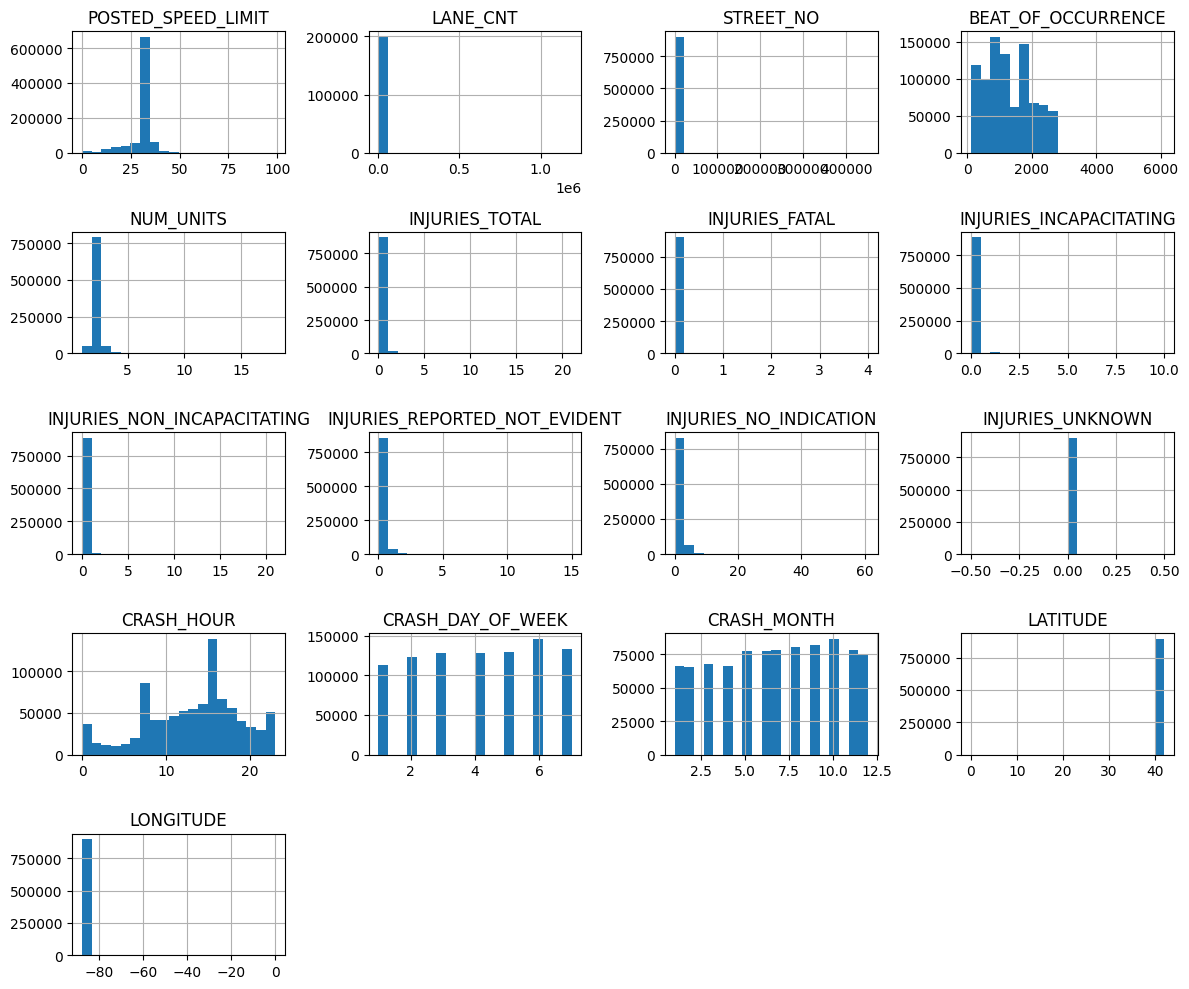

Plotting bar charts for categorical features (top 20 categories)...



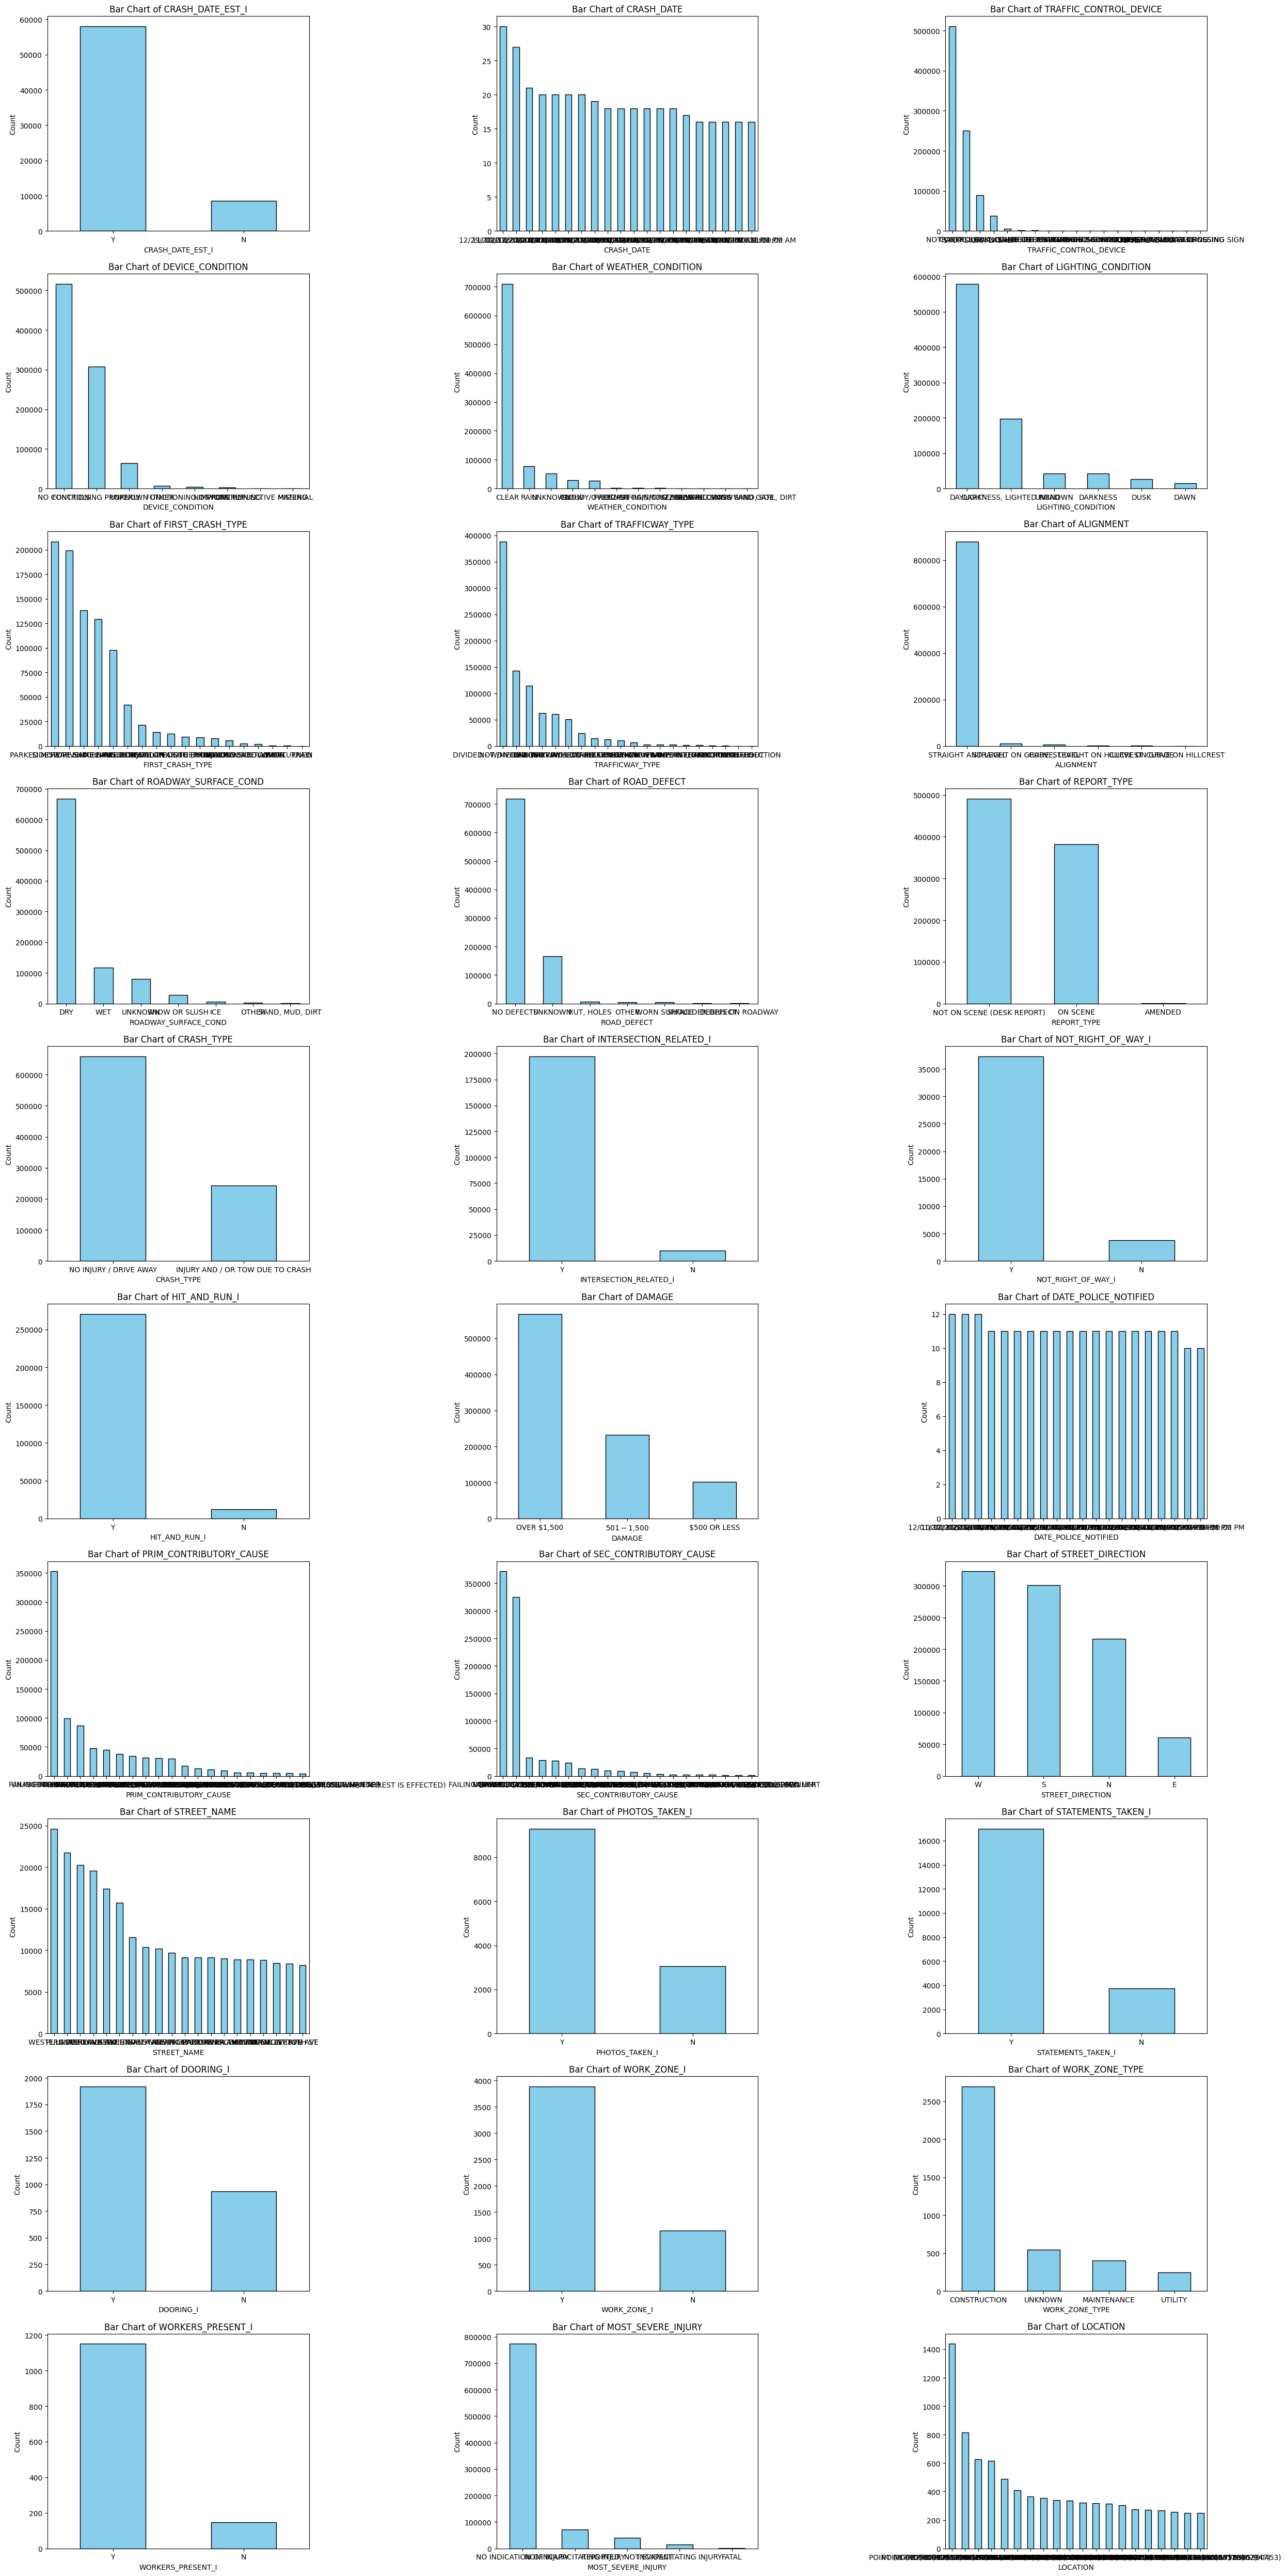

Analyzing date column 'CRASH_DATE'...

Earliest CRASH_DATE: 2013-03-03 16:48:00
Latest CRASH_DATE: 2024-12-14 00:08:00



In [6]:
# Data understanding for Crashes dataset
crashes_df = dataset_understanding('./data/traffic_crashes.csv', date_col='CRASH_DATE')

### 2.2.2 People Dataset

Loading dataset from ./data/people.csv...



/var/folders/q8/0bsr_qhs501_rh9736kfwm1r0000gn/T/ipykernel_1553/2500588725.py:2: DtypeWarning: Columns (19,23,24,25,28) have mixed types.Specify dtype option on import or set low_memory=False.
  people_df = dataset_understanding('./data/people.csv', date_col = 'CRASH_DATE')


First 5 rows of the dataset:

  PERSON_ID PERSON_TYPE                                    CRASH_RECORD_ID  \
0   O749947      DRIVER  81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...   
1   O871921      DRIVER  af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...   
2    O10018      DRIVER  71162af7bf22799b776547132ebf134b5b438dcf3dac6b...   
3    O10038      DRIVER  c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...   
4    O10039      DRIVER  eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...   

   VEHICLE_ID              CRASH_DATE  SEAT_NO     CITY STATE ZIPCODE SEX  \
0    834816.0  09/28/2019 03:30:00 AM      NaN  CHICAGO    IL   60651   M   
1    827212.0  04/13/2020 10:50:00 PM      NaN  CHICAGO    IL   60620   M   
2      9579.0  11/01/2015 05:00:00 AM      NaN      NaN   NaN     NaN   X   
3      9598.0  11/01/2015 08:00:00 AM      NaN      NaN   NaN     NaN   X   
4      9600.0  11/01/2015 10:15:00 AM      NaN      NaN   NaN     NaN   X   

   ...  EMS_RUN_NO     DRIVER_ACTION D

Number of unique values: 14123

-------------------------------------------------- 

Value counts for column 'STATE':
IL    1380585
IN      22830
XX       9451
WI       7097
MI       5331
FL       3883
TX       3206
CA       2924
OH       2765
IA       2057
GA       1990
MN       1744
MO       1744
NY       1624
WA       1328
TN       1205
AZ       1016
NC        924
PA        857
CO        717
NJ        699
ID        696
KY        693
VA        617
MD        589
MS        560
MA        542
AL        522
NV        455
LA        439
AR        399
NB        370
SC        355
KS        345
OK        330
CT        222
OR        220
UT        167
NM        140
SD        113
ND        105
DC         94
MT         90
NH         75
HI         66
DE         65
ME         62
WV         60
WY         55
RI         48
AK         47
VT         37
Name: STATE, dtype: int64
Number of unique values: 52

-------------------------------------------------- 

Value counts for column 'ZIPCODE':
60629      

Number of unique values: 8

-------------------------------------------------- 

Value counts for column 'BAC_RESULT':
TEST NOT OFFERED                   1554246
TEST REFUSED                         16163
TEST PERFORMED, RESULTS UNKNOWN       3715
TEST TAKEN                            2784
Name: BAC_RESULT, dtype: int64
Number of unique values: 4

-------------------------------------------------- 

Value counts for column 'BAC_RESULT VALUE':
0.00    204
0.18    153
0.17    147
0.21    129
0.14    121
0.20    118
0.16    114
0.19    112
0.15     98
0.22     89
0.23     82
0.12     81
0.13     80
0.11     79
0.24     75
0.26     53
0.25     48
0.27     41
0.10     38
0.09     35
0.28     33
0.08     26
0.29     22
0.07     19
0.30     18
0.33     18
0.03     17
0.04     16
0.05     14
0.32     10
0.02      9
0.35      9
0.31      8
0.06      8
0.38      7
0.39      4
0.36      4
0.34      4
1.00      4
0.01      3
0.44      3
0.79      2
0.88      2
0.45      2
0.60      2
0.95      1
0

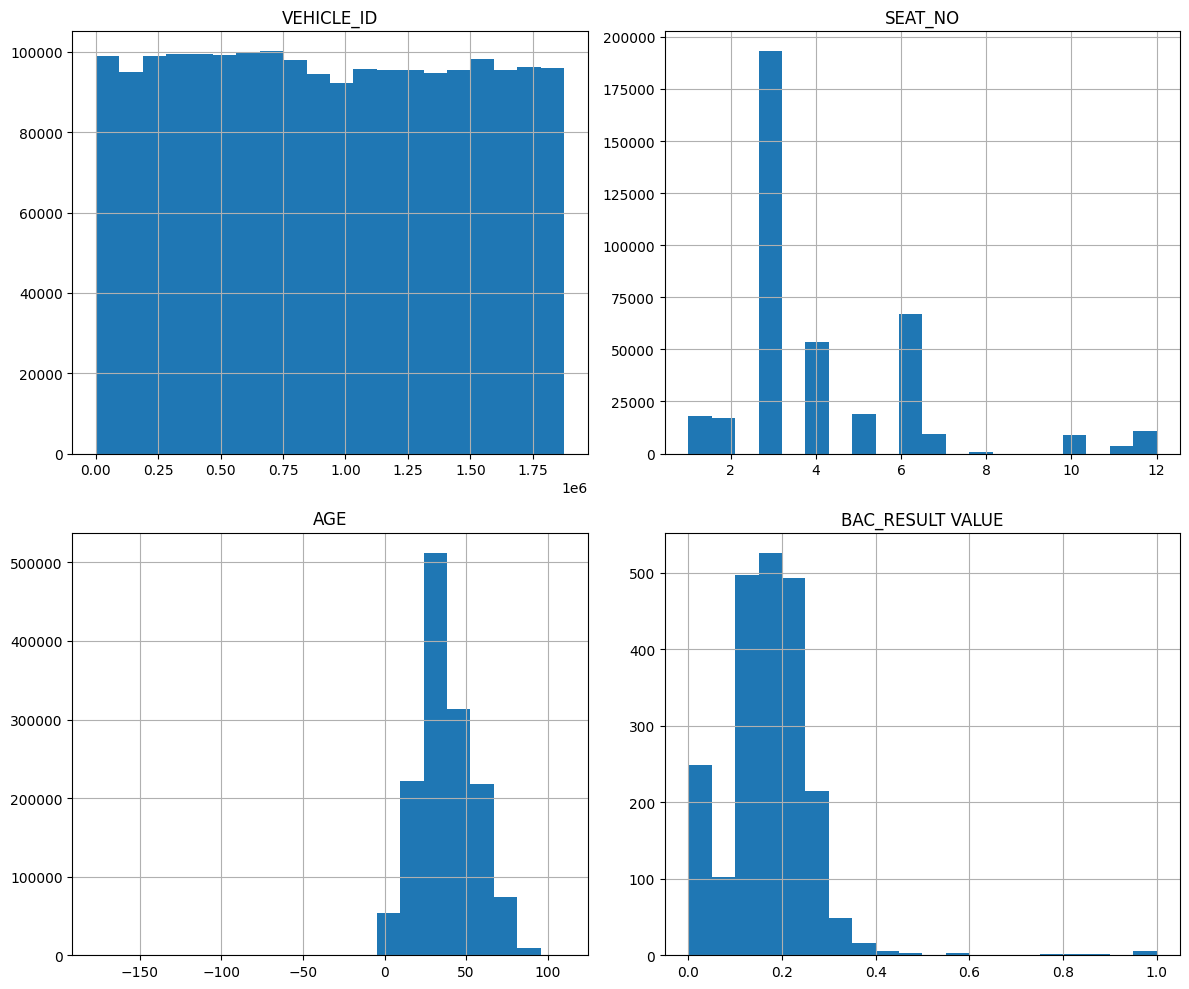

Plotting bar charts for categorical features (top 20 categories)...



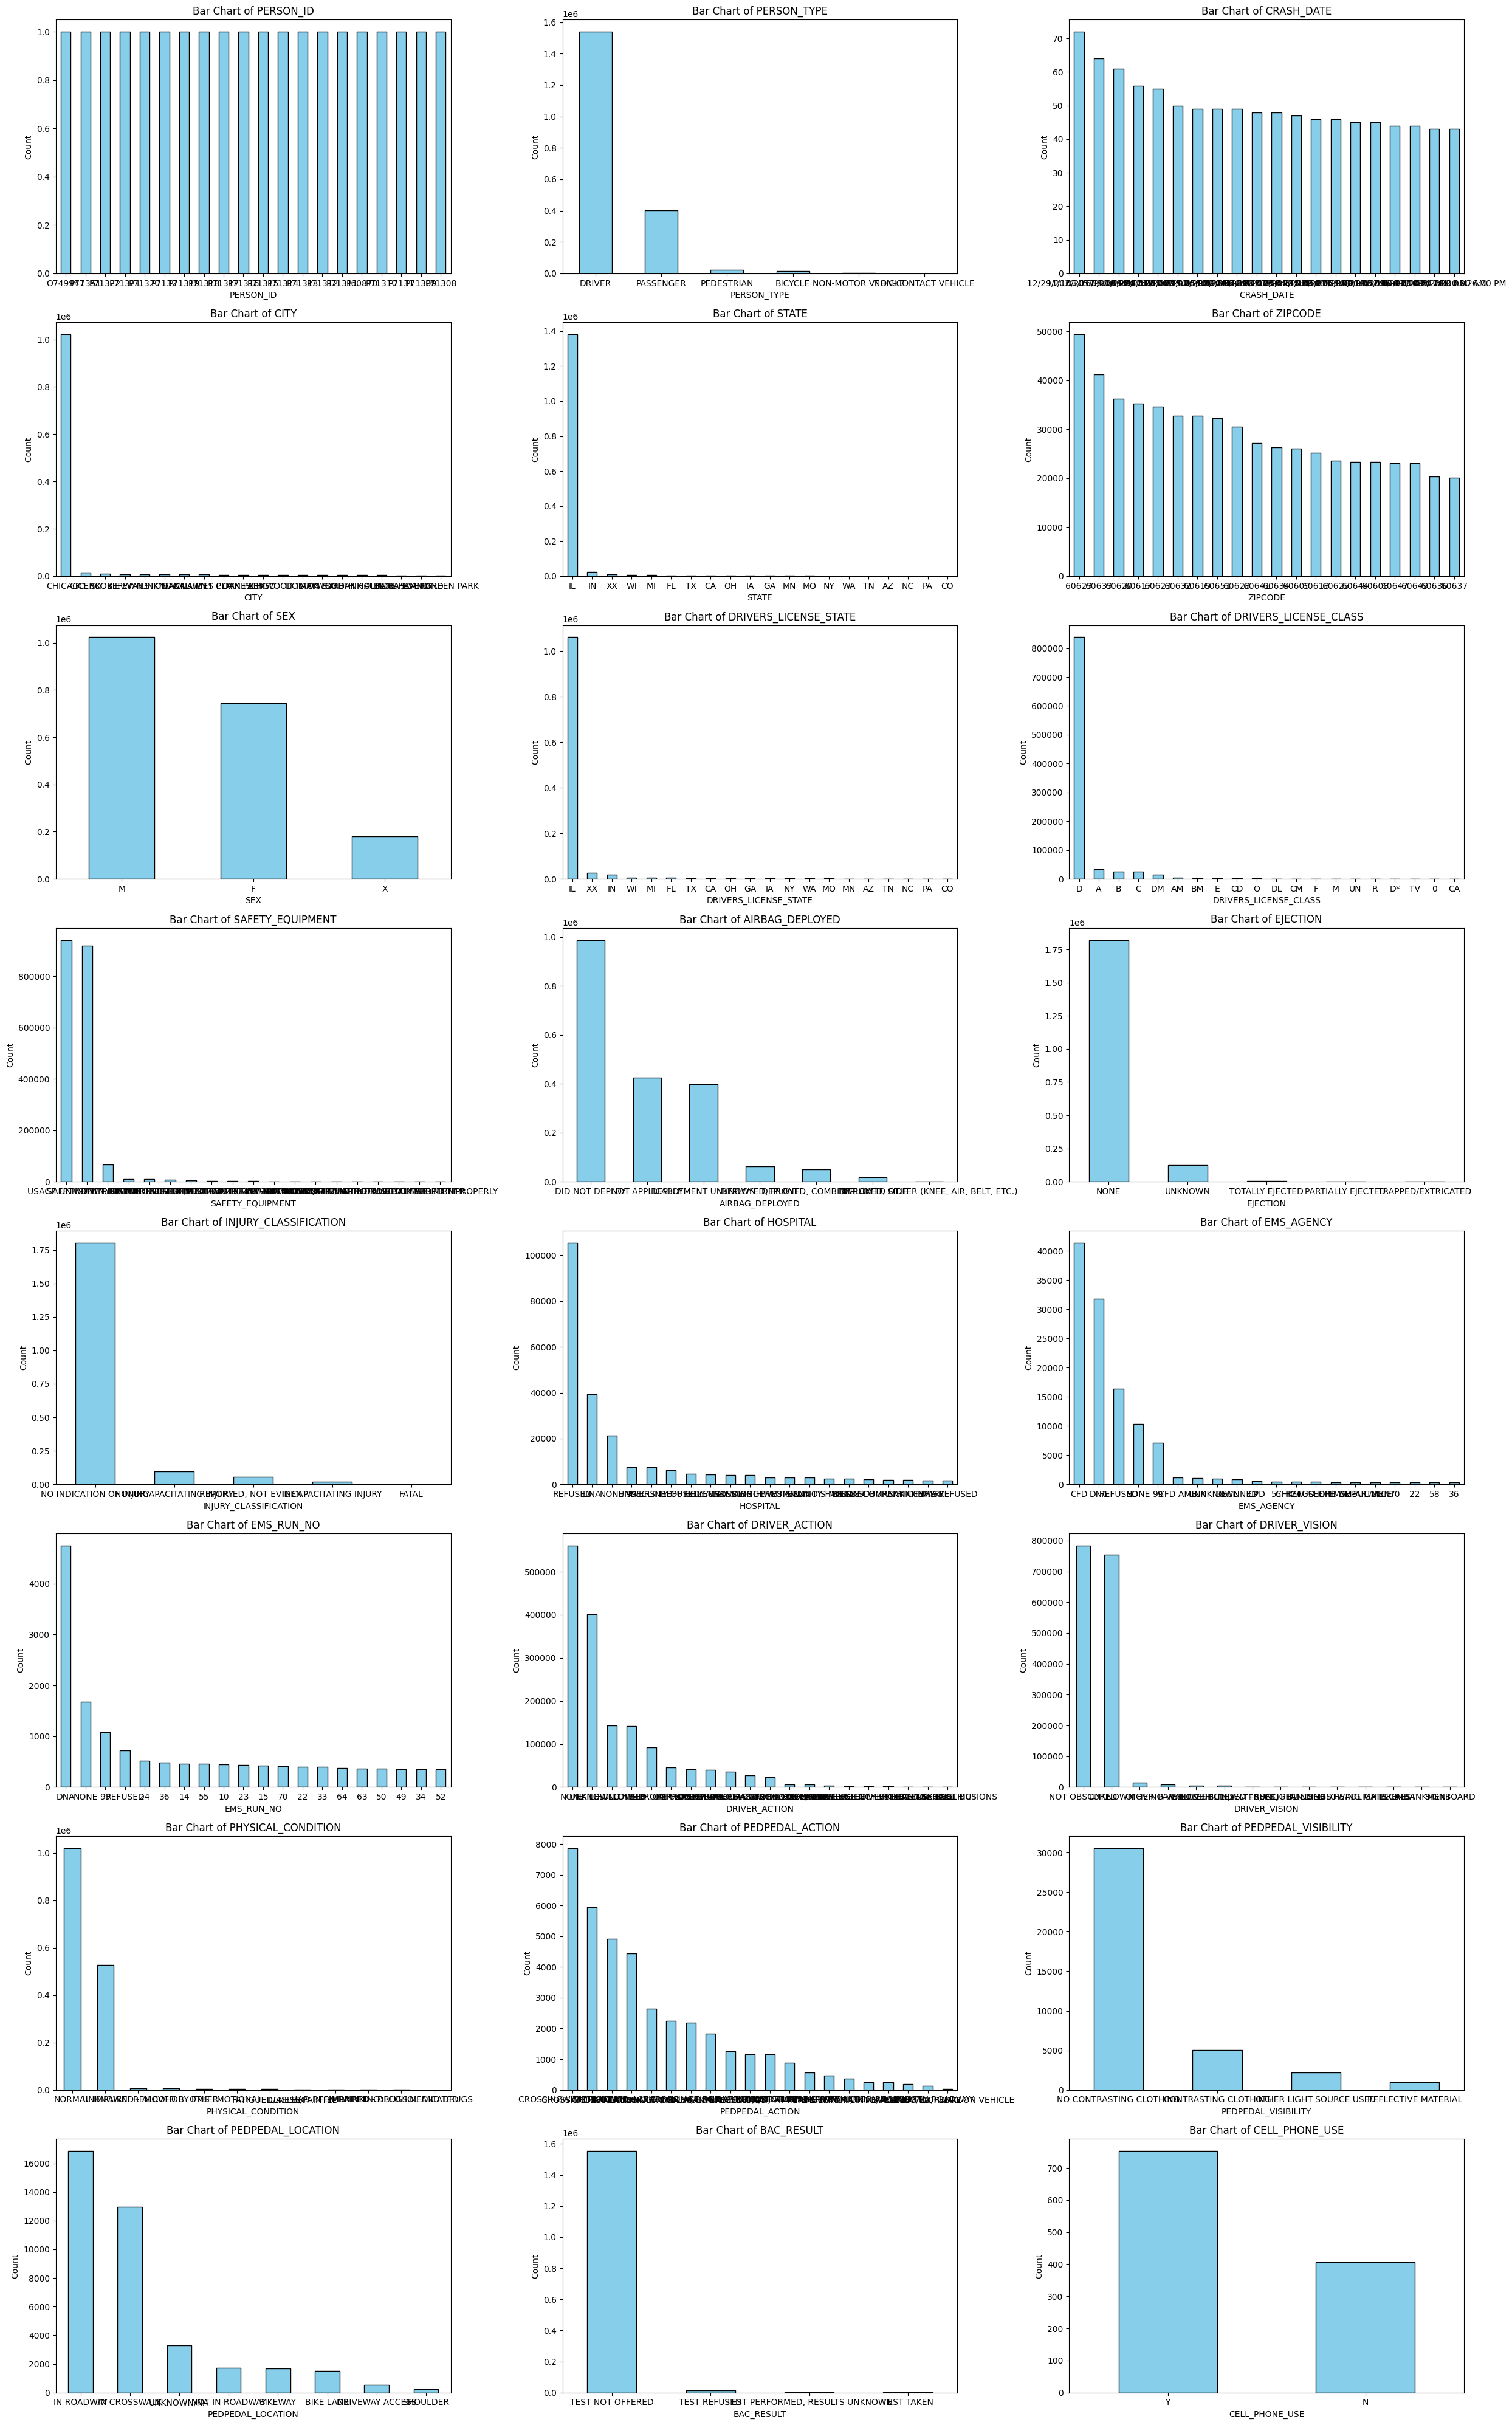

Analyzing date column 'CRASH_DATE'...

Earliest CRASH_DATE: 2013-03-03 16:48:00
Latest CRASH_DATE: 2024-12-14 00:08:00



In [7]:
# Data understanding for People dataset
people_df = dataset_understanding('./data/people.csv', date_col = 'CRASH_DATE')

### 2.2.3 Vehicles Dataset

Loading dataset from ./data/vehicles.csv...



/var/folders/q8/0bsr_qhs501_rh9736kfwm1r0000gn/T/ipykernel_1553/3834750000.py:2: DtypeWarning: Columns (20,39,40,41,43,47,48,49,52,54,57,58,60,70) have mixed types.Specify dtype option on import or set low_memory=False.
  vehicles_df = dataset_understanding('./data/vehicles.csv', date_col = 'CRASH_DATE')


First 5 rows of the dataset:

   CRASH_UNIT_ID                                    CRASH_RECORD_ID  \
0        1717556  7b1763088507f77e0e552c009a6bf89a4d6330c7527706...   
1        1717574  2603ff5a88f0b9b54576934c5ed4e4a64e8278e005687b...   
2        1717579  a52ef70e33d468b855b5be44e8638a564434dcf99c0edf...   
3        1720118  609055f4b1a72a44d6ec40ba9036cefd7c1287a755eb6c...   
4        1720119  609055f4b1a72a44d6ec40ba9036cefd7c1287a755eb6c...   

               CRASH_DATE  UNIT_NO UNIT_TYPE  NUM_PASSENGERS  VEHICLE_ID  \
0  12/06/2023 03:24:00 PM        1    DRIVER             NaN   1634931.0   
1  12/06/2023 04:00:00 PM        2    DRIVER             NaN   1634978.0   
2  12/06/2023 04:30:00 PM        1    DRIVER             NaN   1634948.0   
3  12/10/2023 12:12:00 PM        1    DRIVER             NaN   1637401.0   
4  12/10/2023 12:12:00 PM        2    DRIVER             NaN   1637408.0   

  CMRC_VEH_I      MAKE    MODEL  ... TRAILER1_LENGTH  TRAILER2_LENGTH  \
0        NaN 

Number of unique values: 9

-------------------------------------------------- 

Value counts for column 'NUM_PASSENGERS':
1.0     192482
2.0      50351
3.0      19667
4.0       6490
5.0       1745
6.0        699
7.0        259
8.0        121
10.0        80
9.0         72
11.0        46
12.0        40
14.0        22
15.0        18
13.0        17
17.0        13
19.0        11
18.0        10
16.0         9
27.0         8
24.0         6
26.0         6
20.0         5
28.0         5
43.0         4
35.0         4
29.0         4
40.0         4
25.0         4
21.0         4
34.0         4
32.0         3
22.0         3
42.0         2
33.0         2
46.0         2
36.0         2
23.0         2
38.0         2
30.0         2
31.0         1
59.0         1
37.0         1
52.0         1
Name: NUM_PASSENGERS, dtype: int64
Number of unique values: 44

-------------------------------------------------- 

Value counts for column 'VEHICLE_ID':
1634931.0    1
578807.0     1
578820.0     1
578830.0     1
58

Y    826
N    679
Name: FIRE_I, dtype: int64
Number of unique values: 2

-------------------------------------------------- 

Value counts for column 'OCCUPANT_CNT':
1.0     1301432
0.0      236967
2.0      181570
3.0       47614
4.0       18898
5.0        6204
6.0        1649
7.0         661
8.0         249
9.0         117
11.0         75
10.0         70
12.0         44
13.0         39
15.0         20
14.0         17
16.0         16
18.0         13
20.0         12
19.0         10
17.0          8
28.0          8
25.0          6
26.0          6
36.0          5
21.0          5
29.0          5
44.0          4
27.0          4
41.0          4
35.0          4
33.0          3
23.0          3
30.0          3
22.0          3
39.0          2
31.0          2
43.0          2
34.0          2
47.0          2
99.0          2
38.0          1
37.0          1
60.0          1
24.0          1
32.0          1
53.0          1
Name: OCCUPANT_CNT, dtype: int64
Number of unique values: 47

--------------------

Number of unique values: 51

-------------------------------------------------- 

Value counts for column 'CARRIER_CITY':
CHICAGO              4396
GARY                  211
NOBLESVILLE           184
ARLINGTON HEIGHTS     171
INDIANAPOLIS          169
                     ... 
KINGMAN                 1
EAST CANTAN             1
EARTH CITY              1
DELAVAN                 1
STURGEON BAY            1
Name: CARRIER_CITY, Length: 2142, dtype: int64
Number of unique values: 2142

-------------------------------------------------- 

Value counts for column 'HAZMAT_PLACARDS_I':
N    242
Y    115
Name: HAZMAT_PLACARDS_I, dtype: int64
Number of unique values: 2

-------------------------------------------------- 

Value counts for column 'HAZMAT_NAME':
FLAMMABLE               7
CORROSIVE               5
GASOLINE                5
FLAMMABLE LIQUID        4
PROPANE                 3
OXIDIZER                2
DIESEL FUEL             2
FLAMMABLE GAS           2
NITROGEN                2
FLAMAB

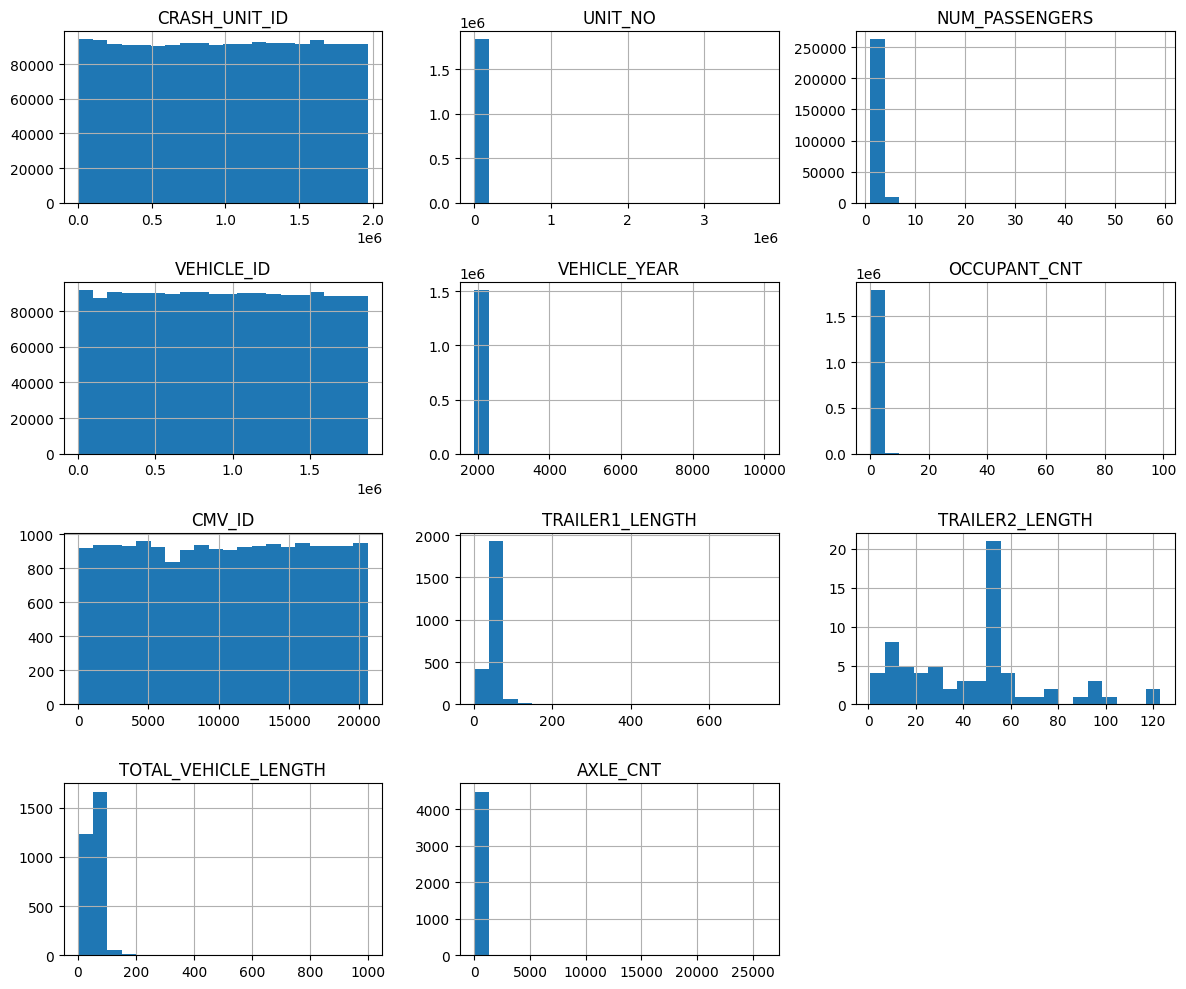

Plotting bar charts for categorical features (top 20 categories)...



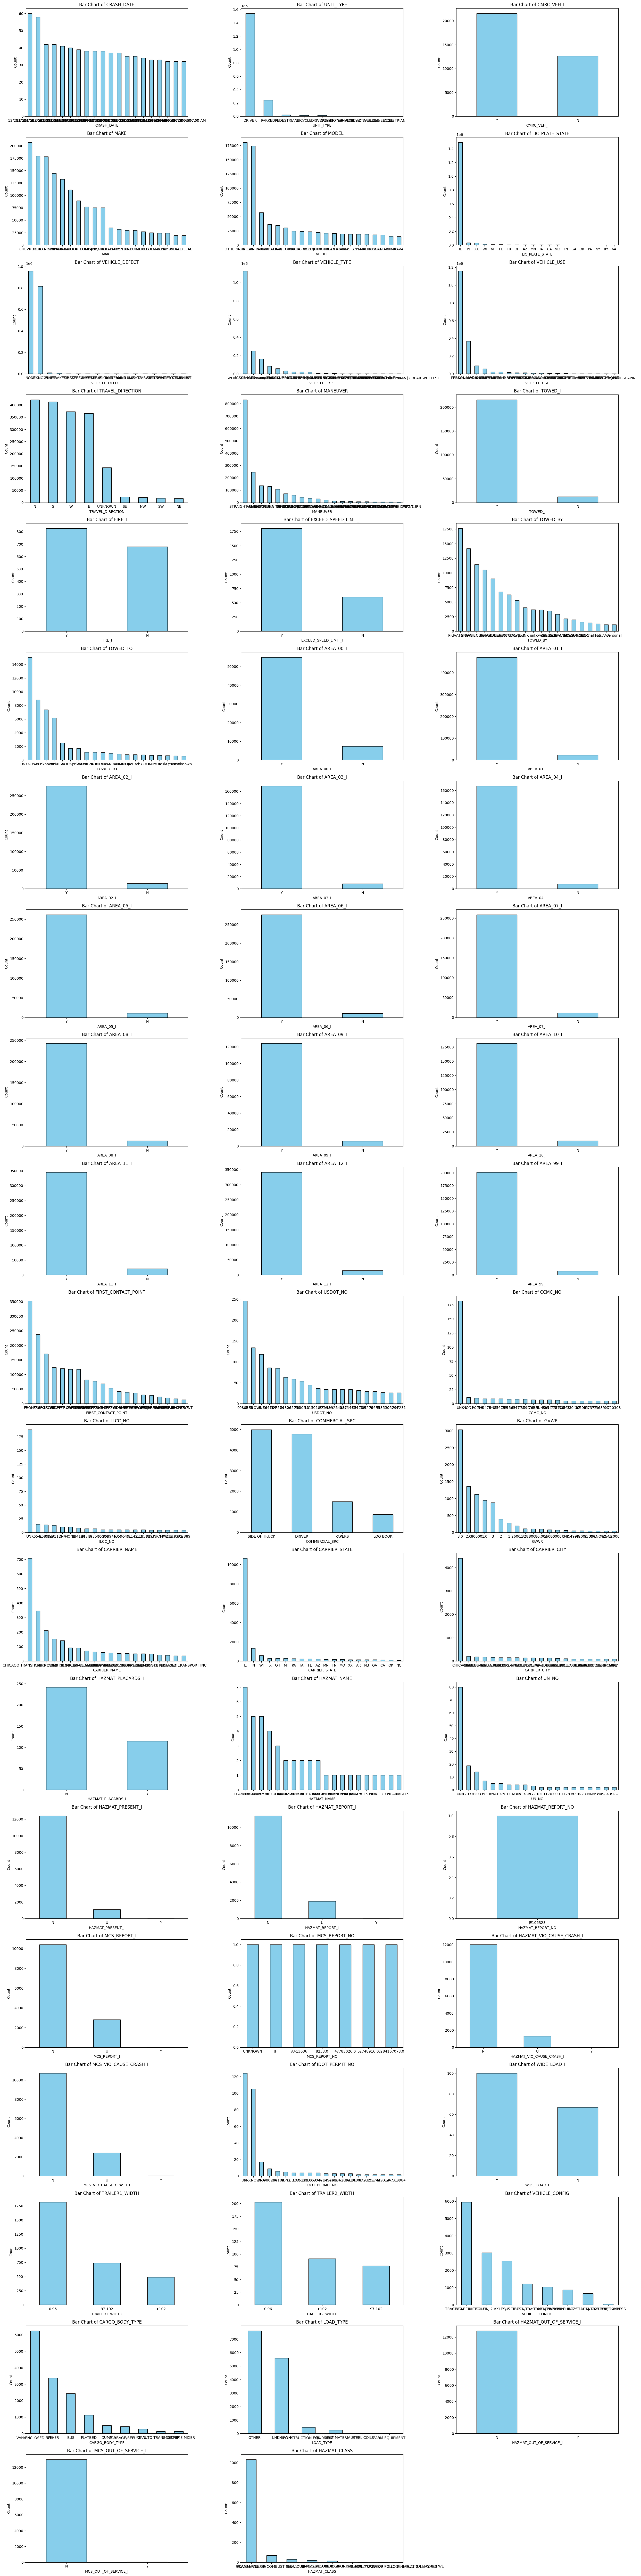

Analyzing date column 'CRASH_DATE'...

Earliest CRASH_DATE: 2013-03-03 16:48:00
Latest CRASH_DATE: 2024-12-14 00:08:00



In [8]:
# Data understanding for Vehicles dataset
vehicles_df = dataset_understanding('./data/vehicles.csv', date_col = 'CRASH_DATE')

### 2.2.4 Target Class

In [10]:
injury_counts = crashes_df['MOST_SEVERE_INJURY'].value_counts()
injury_counts

NO INDICATION OF INJURY     772801
NONINCAPACITATING INJURY     71130
REPORTED, NOT EVIDENT        39463
INCAPACITATING INJURY        15074
FATAL                          985
Name: MOST_SEVERE_INJURY, dtype: int64

In [13]:
crashes_df['MOST_SEVERE_INJURY'].value_counts(normalize = True)

NO INDICATION OF INJURY     0.859190
NONINCAPACITATING INJURY    0.079081
REPORTED, NOT EVIDENT       0.043874
INCAPACITATING INJURY       0.016759
FATAL                       0.001095
Name: MOST_SEVERE_INJURY, dtype: float64

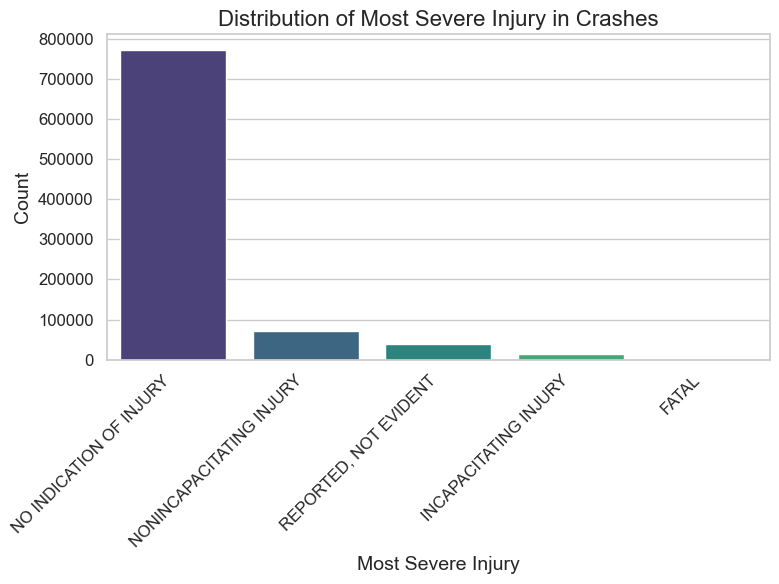

In [15]:
# Create the bar plot
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=injury_counts.index, y=injury_counts.values, palette="viridis")

# Add titles and labels
plt.title('Distribution of Most Severe Injury in Crashes', fontsize=16)
plt.xlabel('Most Severe Injury', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotate x-axis labels if needed
plt.xticks(rotation = 45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show();

## 3. <a name ="Data-Preparation"></a> Data Preparation

For streamlined reproducibility, the data cleaning process was completed in `data_cleaning_notebook.ipynb`. The final cleaned dataset, `crashes_finalized_df`, has been uploaded to Kaggle for easy access.
<br><br>
**Final Cleaned Dataframe Overview**:
   * Subset of merged data from `crashes_df`, `people_df`, and `vehicles_df`
   * ***10***% random sample
   * Sampling kept target class proportions consistent with merged dataset
   * Total of approximately ***64k*** records and ***16*** features
   * Ready for modeling -- no null values

For more detailed information on my data cleaning steps and justifications, please refer to the data_cleaning_steps.py file.

To load the final trimmed and cleaned dataset from Kaggle, use the following code:

In [ ]:
# Code to load the cleaned dataset from Kaggle
import pandas as pd
crashes_final_df = pd.read_csv('./data/crashes_final_df.csv')

Feel free to adjust the [data_cleaning_steps.py](link-to-your-file) placeholder with an actual link to the .py file, depending on how you’re sharing the file (e.g., via a GitHub repo or direct link). This version makes the steps and reasoning even clearer while keeping the instructions to load the dataset easy to follow.

## 4. <a name ="Exploratory-Data-Analysis"></a>Exploratory Data Analysis (EDA)

## 5. <a name ="Modeling"></a>  Modeling

## 6. <a name ="Evaluation"></a> Evaluation

## 7. <a name ="Conclusion"></a> Conclusion

### 7.1 <a name ="Limitations"></a> Limitations

This raises a crucial question: How do we get drivers to slow down? The answer lies in addressing behavior change—a much more complex challenge. Several strategies have been implemented to reduce speed, from speed cushions to lower speed limits, narrower lanes, and increased police presence in high-speed areas, though debates continue over the most effective approaches.

### 7.2 <a name ="Recommendations"></a> Recommendations

### 7.3 <a name ="Next-Steps"></a> Next Steps

## 8. <a name ="References"></a> References 

1. City of Philadelphia. (2024). *Vision Zero Annual Report 2024*. Philadelphia.gov. https://visionzerophl.com/plans-and-reports/annual-report-2024/


2. Chicago Department of Transportation (CDOT). (2024). *Chicago Annual Traffic Report 2024*. City of Chicago. https://api.chicago.gov/filenet5/servlets/getDocumentContent?applicationId=CompleteStreets&documentId=%7B60FB7292-0000-CB1B-AC4D-334F5F94606B%7D


3. Vision Zero Network. (2024). *What is Vision Zero?* Vision Zero Network. https://visionzeronetwork.org/about/what-is-vision-zero/


4. Vision Zero Philadelphia. (n.d.). *Get involved*. Vision Zero Philadelphia. https://visionzerophl.com/get-involved/


5. Illinois Department of Transportation. (2024). *Illinois fatal crash data: 2024 snapshot*. Illinois Department of Transportation. https://apps.dot.illinois.gov/FatalCrash/snapshot.html


6. City of Chicago. (2017). *Vision Zero Action Plan 2017-2019*. City of Chicago. https://api.chicago.gov/filenet5/servlets/getDocumentContent?applicationId=CompleteStreets&documentId=%7B0031C690-0000-C016-92E9-31618D7320B1%7D